<a href="https://colab.research.google.com/github/p82maavd/IAA/blob/main/Practica1Metaheuristica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1

--------------
Num:  15
Tiempo:  0.023577451705932617
Solucion final:  [4, 6, 7, 5, 3, 12, 0, 14, 10, 13, 2, 1, 9, 8, 11]
Longitud de la ruta final:  2421
--------------
--------------
Num:  20
Tiempo:  0.08128690719604492
Solucion final:  [10, 14, 13, 16, 6, 2, 12, 1, 19, 7, 3, 4, 0, 17, 8, 18, 11, 15, 9, 5]
Longitud de la ruta final:  3145
--------------
--------------
Num:  25
Tiempo:  0.17176556587219238
Solucion final:  [13, 2, 20, 17, 4, 15, 22, 0, 11, 16, 14, 10, 23, 18, 12, 1, 24, 19, 9, 5, 7, 21, 8, 3, 6]
Longitud de la ruta final:  3279
--------------
--------------
Num:  30
Tiempo:  0.3599421977996826
Solucion final:  [16, 20, 6, 4, 18, 11, 10, 8, 2, 27, 3, 13, 19, 17, 0, 26, 21, 25, 1, 24, 12, 23, 22, 7, 15, 5, 28, 9, 29, 14]
Longitud de la ruta final:  3176
--------------
--------------
Num:  35
Tiempo:  0.8922672271728516
Solucion final:  [3, 20, 0, 24, 4, 17, 15, 6, 22, 7, 23, 11, 34, 32, 8, 9, 1, 13, 33, 21, 31, 2, 18, 30, 29, 10, 16, 14, 25, 27, 28, 26, 12, 5, 19]
Long

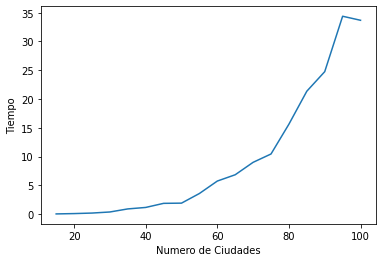

In [3]:
import random
import time
import matplotlib.pyplot as plt

def generador(nCiudades):
    tsp = []
    for i in range(nCiudades):
        distancias = []
        for j in range(nCiudades):
            if j == i:
                distancias.append(0)
            elif j < i:
                distancias.append(tsp[j][i])
            else:
                distancias.append(random.randint(10, 1000))
        tsp.append(distancias)
    return tsp

def evaluarSolucion(datos, solucion):
    longitud = 0
    for i in range(len(solucion)):
        longitud += datos[solucion[i - 1]][solucion[i]]
    return longitud

def obtenerMejorVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    l=len(solucion)
    for i in range(l):
        for j in range(i+1, l):
            n = solucion.copy()
            n[i] = solucion[j]
            n[j] = solucion[i]
            vecinos.append(n)

    ##Obtención del mejor vecino
    mejorVecino = vecinos[0]
    mejorLongitud = evaluarSolucion(datos, mejorVecino)
    for vecino in vecinos:
        longitud = evaluarSolucion(datos, vecino)
        if longitud < mejorLongitud:
            mejorLongitud = longitud
            mejorVecino = vecino
    return mejorVecino, mejorLongitud

def hillClimbing(datos):
    l=len(datos)
    ##Creamos una solucion aleatoria (primera solucion)
    ciudades = list(range(l))
    solucion = []
    for i in range(l):
        ciudad = ciudades[random.randint(0, len(ciudades) - 1)]
        solucion.append(ciudad)
        ciudades.remove(ciudad)
    longitud = evaluarSolucion(datos, solucion)

    #print("Longitud de la ruta: ", longitud)
    ##Obtenemos el mejor vecino hasta que no haya vecinos mejores (primer optimo)
    vecino = obtenerMejorVecino(solucion, datos)
    while vecino[1] < longitud:
        solucion = vecino[0]
        longitud = vecino[1]
       # print("Longitud de la ruta: ", longitud)
        vecino = obtenerMejorVecino(solucion, datos)
    
    mejor_solucion=solucion
    mejor_longitud=longitud
    cambios=len(solucion)*0.15
    ##Entramos en la Iterated Local Search
    ##Hara 10 iteraciones permitiedo una perturbacion del 30% de las ciudades
    for i in range(10):
        solucion=mejor_solucion
        ciudades_rand = list(range(l))
        for x in range(0,int(cambios)+1):
          a=ciudades_rand[random.randint(0, len(ciudades_rand) - 1)]
          ciudades_rand.remove(a)
          b=ciudades_rand[random.randint(0, len(ciudades_rand) - 1)]
          ciudades_rand.remove(b)
          solucion[a], solucion[b] = solucion[b], solucion[a]

        #calcular la nueva longitud de la solucion obtenida tras la permutacion
        longitud = evaluarSolucion(datos, solucion)

        #obtener el nuevo optimo
        vecino = obtenerMejorVecino(solucion, datos)
        while vecino[1] < longitud:
            solucion = vecino[0]
            longitud = vecino[1]
            #print("Longitud de la ruta: ", longitud)
            vecino = obtenerMejorVecino(solucion, datos)
            
        #print("Sol i: ",i, " = ", longitud)

        #comprobar si se mejora la ruta al terminar la ILS (necesario guardar la longitud antigua)
        if longitud < mejor_longitud:
                #print("se ha mejorado la longitud, nueva longitud: ", longitud)
                mejor_solucion=solucion
                mejor_longitud=longitud
    
    #print("v2: ",longitud)
    return mejor_solucion, mejor_longitud

def main():

    Numero = []
    Tiempo = []
    for i in range(15,101,5):

        tsp = generador(i)

        tini = time.time()
        s=hillClimbing(tsp)

        tfin = time.time()

        tp = tfin - tini
        print("--------------")
        print("Num: ",i)
        print("Tiempo: ", tp)
        print("Solucion final: ",s[0])
        print("Longitud de la ruta final: ",s[1])
        print("--------------")

        Numero.append(i)
        Tiempo.append(tp)

    fig, ax = plt.subplots()
    ax.plot(Numero, Tiempo)
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Numero de Ciudades")
    plt.show()



if __name__ == "__main__":
    main()

Ejercicio 2

Longitud de la ruta:  4826
Temperatura:  10
--------------
Num:  50
Tiempo:  0.011344432830810547
Solucion final:  [4, 0, 3, 1, 9, 5, 2, 7, 6, 8]
Longitud de la ruta final:  2651


Longitud de la ruta:  11387
Temperatura:  10
--------------
Num:  50
Tiempo:  0.03803110122680664
Solucion final:  [16, 3, 8, 0, 17, 9, 14, 7, 13, 4, 15, 6, 19, 18, 5, 2, 12, 1, 11, 10]
Longitud de la ruta final:  4203


Longitud de la ruta:  12618
Temperatura:  10
--------------
Num:  50
Tiempo:  0.08142375946044922
Solucion final:  [18, 15, 14, 16, 17, 6, 1, 7, 19, 25, 26, 10, 0, 28, 4, 9, 21, 24, 8, 2, 29, 22, 11, 27, 20, 3, 5, 13, 23, 12]
Longitud de la ruta final:  5479


Longitud de la ruta:  19559
Temperatura:  10
--------------
Num:  50
Tiempo:  0.2761561870574951
Solucion final:  [25, 37, 34, 11, 4, 30, 3, 15, 29, 8, 7, 9, 16, 6, 19, 26, 28, 35, 5, 21, 27, 31, 32, 17, 39, 14, 18, 23, 33, 12, 1, 24, 20, 2, 0, 38, 10, 22, 13, 36]
Longitud de la ruta final:  6384


Longitud de la ruta:  24896
Temperatu

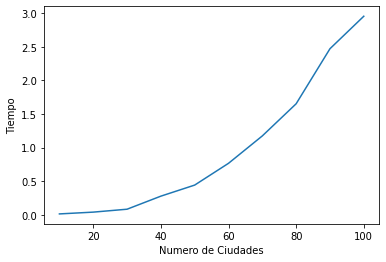

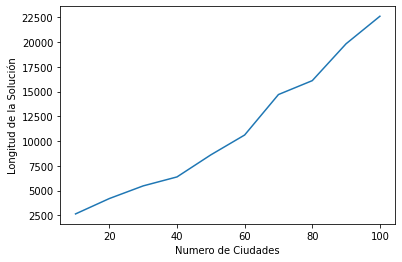

In [8]:
import random
import math
import time
import matplotlib.pyplot as plt

def generador(nCiudades):
    tsp = []
    for i in range(nCiudades):
        distancias = []
        for j in range(nCiudades):
            if j == i:
                distancias.append(0)
            elif j < i:
                distancias.append(tsp[j][i])
            else:
                distancias.append(random.randint(10, 1000))
        tsp.append(distancias)
    return tsp

def evaluarSolucion(datos, solucion):
    longitud = 0
    for i in range(len(solucion)):
        longitud += datos[solucion[i - 1]][solucion[i]]
    return longitud

def obtenerVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    l=len(solucion)
    for i in range(l):
        for j in range(i+1, l):
            n = solucion.copy()
            n[i] = solucion[j]
            n[j] = solucion[i]
            vecinos.append(n)

    ##Obtengo un vecino aleatorio
    vecino=vecinos[random.randint(0, len(vecinos) - 1)]
    longitud = evaluarSolucion(datos, vecino)

    return vecino, longitud

def simAnnealing(datos,t0,tfinal):
    t=t0
    l=len(datos)
    ##Creamos una solucion aleatoria
    ciudades = list(range(l))
    solucion = []
    for i in range(l):
        ciudad = ciudades[random.randint(0, len(ciudades) - 1)]
        solucion.append(ciudad)
        ciudades.remove(ciudad)
    longitud = evaluarSolucion(datos, solucion)
    print("Longitud de la ruta: ", longitud)
    print("Temperatura: ", t)

    it=0
    while t > tfinal:
        ##Obtenemos un vecino al azar
        vecino = obtenerVecino(solucion, datos)
        incremento = vecino[1]-longitud

        if incremento < 0:
            longitud = vecino[1]
            solucion = vecino[0]
        elif random.random() < math.exp(-abs(incremento) / t):
            longitud = vecino[1]
            solucion = vecino[0]

        it+=1

        t=0.99*t
        #print("Longitud de la ruta: ", longitud)
        #print("Temperatura: ", t)
    return solucion, longitud

def main():
    t0=10
    Numero = []
    Tiempo = []
    Solucion = []
    #for i in range(15,60,5):
    for numeroCiudades in range(10,101,10):
    
      datos=generador(numeroCiudades)
      tini = time.time()
      s=simAnnealing(datos,10,0.05)
      tfin = time.time()
      tp = tfin - tini
      print("--------------")
      print("Num: ",50)
      print("Tiempo: ", tp)
      print("Solucion final: ",s[0])
      print("Longitud de la ruta final: ",s[1])
      print("")
      print("")
      Numero.append(numeroCiudades)
      Tiempo.append(tp)
      Solucion.append(s[1])

    fig, ax = plt.subplots()
    ax.plot(Numero, Tiempo)
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Numero de Ciudades")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(Numero, Solucion)
    ax.set_ylabel("Longitud de la Solución")
    ax.set_xlabel("Numero de Ciudades")
    plt.show()



if __name__ == "__main__":
    main()


Ejercicio 2 Busqueda Hiperparametros

Longitud de la ruta:  48407
Temperatura:  1
--------------
Num:  50
Tiempo:  2.0676918029785156
Solucion final:  [97, 74, 44, 32, 19, 9, 21, 95, 51, 69, 37, 11, 47, 78, 67, 63, 62, 27, 16, 8, 20, 18, 38, 57, 92, 17, 59, 23, 70, 61, 39, 5, 34, 75, 22, 50, 14, 54, 15, 96, 68, 88, 81, 35, 3, 48, 42, 30, 90, 29, 86, 4, 65, 24, 93, 41, 26, 55, 82, 72, 56, 79, 80, 49, 89, 85, 66, 83, 64, 43, 73, 71, 91, 12, 1, 10, 60, 28, 84, 87, 77, 40, 99, 45, 6, 13, 46, 98, 52, 53, 76, 25, 36, 2, 0, 31, 7, 33, 94, 58]
Longitud de la ruta final:  25851


Longitud de la ruta:  54683
Temperatura:  11
--------------
Num:  50
Tiempo:  3.686396598815918
Solucion final:  [28, 98, 93, 52, 49, 75, 34, 3, 20, 12, 45, 92, 35, 23, 63, 64, 67, 68, 69, 94, 65, 2, 96, 61, 53, 86, 11, 60, 39, 32, 99, 89, 76, 37, 54, 30, 71, 46, 18, 38, 51, 84, 74, 57, 17, 77, 95, 48, 97, 72, 40, 42, 31, 43, 81, 13, 70, 83, 66, 29, 59, 56, 24, 1, 25, 19, 44, 8, 73, 10, 62, 4, 6, 85, 80, 9, 22, 55, 7, 91, 33, 41, 79, 90, 14, 50, 26, 27, 88

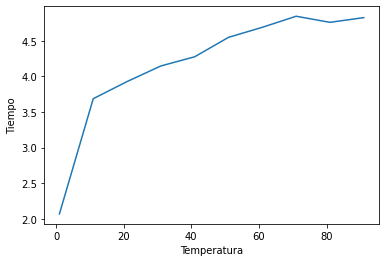

Longitud de la ruta:  52795
Temperatura:  10
--------------
Num:  50
Tiempo:  4.5190489292144775
Solucion final:  [62, 7, 63, 53, 28, 45, 43, 46, 66, 93, 27, 72, 2, 80, 38, 37, 36, 22, 96, 68, 76, 51, 98, 92, 16, 4, 90, 34, 41, 97, 61, 52, 31, 10, 20, 50, 33, 26, 91, 24, 78, 95, 87, 9, 57, 77, 79, 49, 81, 70, 71, 73, 44, 54, 1, 56, 18, 3, 83, 13, 14, 25, 6, 75, 40, 35, 84, 74, 0, 8, 15, 60, 55, 67, 85, 11, 69, 99, 64, 89, 82, 88, 47, 19, 42, 12, 21, 23, 17, 94, 65, 32, 30, 59, 39, 29, 5, 48, 86, 58]
Longitud de la ruta final:  20714


Longitud de la ruta:  48922
Temperatura:  10
--------------
Num:  50
Tiempo:  3.3594067096710205
Solucion final:  [73, 64, 35, 90, 28, 52, 86, 5, 44, 84, 39, 94, 18, 97, 24, 20, 62, 6, 29, 48, 23, 61, 76, 72, 92, 30, 31, 32, 34, 99, 43, 4, 7, 46, 54, 8, 60, 22, 65, 14, 98, 45, 25, 47, 53, 83, 2, 26, 38, 16, 75, 19, 11, 12, 74, 50, 88, 40, 27, 42, 69, 71, 95, 58, 56, 57, 10, 51, 96, 59, 15, 1, 70, 68, 17, 37, 81, 66, 36, 9, 80, 55, 78, 33, 91, 82, 67, 0, 3

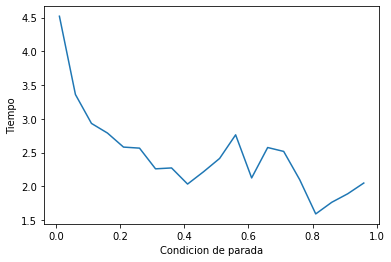

In [6]:
import random
import math
import time

def generador(nCiudades):
    tsp = []
    for i in range(nCiudades):
        distancias = []
        for j in range(nCiudades):
            if j == i:
                distancias.append(0)
            elif j < i:
                distancias.append(tsp[j][i])
            else:
                distancias.append(random.randint(10, 1000))
        tsp.append(distancias)
    return tsp

def evaluarSolucion(datos, solucion):
    longitud = 0
    for i in range(len(solucion)):
        longitud += datos[solucion[i - 1]][solucion[i]]
    return longitud

def obtenerVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    l=len(solucion)
    for i in range(l):
        for j in range(i+1, l):
            n = solucion.copy()
            n[i] = solucion[j]
            n[j] = solucion[i]
            vecinos.append(n)

    ##Obtengo un vecino aleatorio
    vecino=vecinos[random.randint(0, len(vecinos) - 1)]
    longitud = evaluarSolucion(datos, vecino)

    return vecino, longitud

def simAnnealing(datos,t0,tfinal):
    t=t0
    l=len(datos)
    ##Creamos una solucion aleatoria
    ciudades = list(range(l))
    solucion = []
    for i in range(l):
        ciudad = ciudades[random.randint(0, len(ciudades) - 1)]
        solucion.append(ciudad)
        ciudades.remove(ciudad)
    longitud = evaluarSolucion(datos, solucion)
    print("Longitud de la ruta: ", longitud)
    print("Temperatura: ", t)

    it=0
    while t > tfinal:
        ##Obtenemos un vecino al azar
        vecino = obtenerVecino(solucion, datos)
        incremento = vecino[1]-longitud

        if incremento < 0:
            longitud = vecino[1]
            solucion = vecino[0]
        elif random.random() < math.exp(-abs(incremento) / t):
            longitud = vecino[1]
            solucion = vecino[0]

        it+=1

        t=0.99*t
        #print("Longitud de la ruta: ", longitud)
        #print("Temperatura: ", t)
    return solucion, longitud

def main():
    t0=10
    Numero = []
    Tiempo = []
    #for i in range(15,60,5):
    for temperaturaInicial in range(1,101,10):
    

      datos=generador(100)
      tini = time.time()
      s=simAnnealing(datos,temperaturaInicial,0.05)
      tfin = time.time()
      tp = tfin - tini
      print("--------------")
      print("Num: ",50)
      print("Tiempo: ", tp)
      print("Solucion final: ",s[0])
      print("Longitud de la ruta final: ",s[1])
      print("")
      print("")
      Numero.append(temperaturaInicial)
      Tiempo.append(tp)

    fig, ax = plt.subplots()
    ax.plot(Numero, Tiempo)
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Temperatura")
    plt.show()
    Numero = []
    Tiempo = []

    for temperaturaFinal in range(1,101,5):
        datos=generador(100)
        tini = time.time()
        s=simAnnealing(datos,10,temperaturaFinal/100)
        tfin = time.time()
        tp = tfin - tini
        print("--------------")
        print("Num: ",50)
        print("Tiempo: ", tp)
        print("Solucion final: ",s[0])
        print("Longitud de la ruta final: ",s[1])
        print("")
        print("")
        Numero.append(temperaturaFinal/100)
        Tiempo.append(tp)

    fig, ax = plt.subplots()
    ax.plot(Numero, Tiempo)
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Condicion de parada")
    plt.show()


if __name__ == "__main__":
    main()


Funcion de Enfriamiento

Longitud de la ruta:  5320
Temperatura:  10
--------------
Num:  11
Tiempo:  0.015613079071044922
Solucion final:  [5, 2, 3, 7, 10, 0, 6, 1, 9, 4, 8]
Longitud de la ruta final:  2696


Longitud de la ruta:  10434
Temperatura:  10
--------------
Num:  16
Tiempo:  0.030785083770751953
Solucion final:  [9, 1, 7, 13, 14, 11, 8, 4, 10, 3, 2, 5, 6, 0, 12, 15]
Longitud de la ruta final:  2693


Longitud de la ruta:  11819
Temperatura:  10
--------------
Num:  21
Tiempo:  0.05132246017456055
Solucion final:  [7, 11, 14, 8, 10, 15, 9, 4, 16, 0, 3, 12, 18, 6, 1, 2, 13, 20, 5, 17, 19]
Longitud de la ruta final:  3824


Longitud de la ruta:  12612
Temperatura:  10
--------------
Num:  26
Tiempo:  0.08022212982177734
Solucion final:  [19, 5, 12, 23, 14, 6, 11, 9, 10, 18, 17, 8, 1, 25, 2, 22, 4, 15, 16, 21, 20, 24, 3, 0, 13, 7]
Longitud de la ruta final:  3924


Longitud de la ruta:  17931
Temperatura:  10
--------------
Num:  31
Tiempo:  0.1156003475189209
Solucion final:  [26, 14, 11, 20, 15, 3, 9

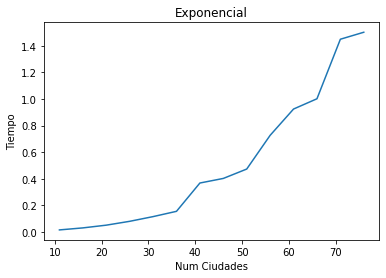

Longitud de la ruta:  5949
Temperatura:  10
--------------
Num:  11
Tiempo:  0.029054641723632812
Solucion final:  [2, 8, 10, 4, 5, 1, 6, 7, 9, 3, 0]
Longitud de la ruta final:  2515


Longitud de la ruta:  10227
Temperatura:  10
--------------
Num:  16
Tiempo:  0.027390241622924805
Solucion final:  [11, 10, 9, 1, 7, 15, 12, 2, 3, 6, 5, 8, 13, 4, 0, 14]
Longitud de la ruta final:  2415


Longitud de la ruta:  12086
Temperatura:  10
--------------
Num:  21
Tiempo:  0.0515596866607666
Solucion final:  [10, 5, 15, 16, 9, 13, 3, 14, 18, 19, 1, 7, 0, 2, 12, 20, 11, 17, 8, 4, 6]
Longitud de la ruta final:  3844


Longitud de la ruta:  14070
Temperatura:  10
--------------
Num:  26
Tiempo:  0.0807793140411377
Solucion final:  [5, 24, 4, 25, 6, 3, 0, 13, 18, 23, 7, 2, 9, 8, 15, 16, 11, 22, 12, 19, 20, 21, 1, 17, 10, 14]
Longitud de la ruta final:  4460


Longitud de la ruta:  18574
Temperatura:  10
--------------
Num:  31
Tiempo:  0.12554931640625
Solucion final:  [11, 19, 1, 13, 28, 9, 6, 14,

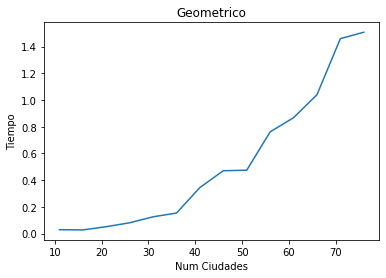

Longitud de la ruta:  6872
Temperatura:  10
--------------
Num:  11
Tiempo:  0.012592315673828125
Solucion final:  [2, 10, 3, 6, 5, 0, 7, 9, 8, 1, 4]
Longitud de la ruta final:  2174


Longitud de la ruta:  6266
Temperatura:  10
--------------
Num:  16
Tiempo:  0.013278961181640625
Solucion final:  [11, 6, 9, 0, 2, 10, 5, 14, 15, 8, 3, 13, 4, 12, 7, 1]
Longitud de la ruta final:  3022


Longitud de la ruta:  10148
Temperatura:  10
--------------
Num:  21
Tiempo:  0.02624058723449707
Solucion final:  [4, 9, 15, 16, 8, 13, 12, 17, 0, 1, 14, 5, 18, 11, 10, 7, 20, 2, 19, 3, 6]
Longitud de la ruta final:  3953


Longitud de la ruta:  13557
Temperatura:  10
--------------
Num:  26
Tiempo:  0.02838873863220215
Solucion final:  [19, 25, 8, 9, 11, 20, 2, 22, 6, 18, 17, 14, 21, 4, 1, 15, 23, 16, 10, 0, 5, 13, 12, 24, 3, 7]
Longitud de la ruta final:  6094


Longitud de la ruta:  17323
Temperatura:  10
--------------
Num:  31
Tiempo:  0.04380965232849121
Solucion final:  [6, 7, 22, 17, 0, 26, 9, 

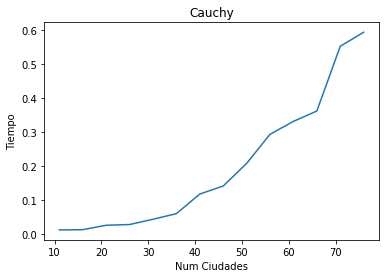

Longitud de la ruta:  6443
Temperatura:  10
--------------
Num:  11
Tiempo:  0.5585160255432129
Solucion final:  [10, 5, 1, 6, 2, 0, 4, 9, 8, 3, 7]
Longitud de la ruta final:  2328


Longitud de la ruta:  7747
Temperatura:  10
--------------
Num:  16
Tiempo:  1.1154437065124512
Solucion final:  [2, 15, 10, 3, 9, 6, 12, 11, 13, 4, 1, 7, 5, 14, 0, 8]
Longitud de la ruta final:  3055


Longitud de la ruta:  9402
Temperatura:  10
--------------
Num:  21
Tiempo:  1.9437007904052734
Solucion final:  [7, 19, 18, 8, 14, 6, 20, 10, 3, 16, 17, 2, 5, 12, 4, 15, 0, 1, 13, 9, 11]
Longitud de la ruta final:  3618


Longitud de la ruta:  13926
Temperatura:  10
--------------
Num:  26
Tiempo:  3.2434725761413574
Solucion final:  [14, 10, 1, 2, 24, 19, 12, 7, 4, 22, 17, 13, 5, 3, 18, 11, 25, 9, 20, 23, 6, 15, 0, 21, 8, 16]
Longitud de la ruta final:  3939


Longitud de la ruta:  15511
Temperatura:  10
--------------
Num:  31
Tiempo:  4.379838228225708
Solucion final:  [23, 30, 11, 28, 10, 20, 3, 5, 6, 

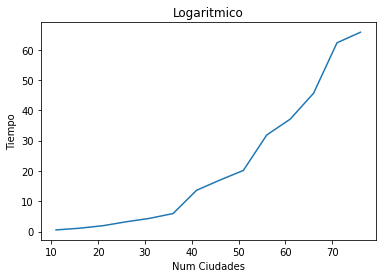

In [7]:
import random
import math
import time


def generador(nCiudades):
    tsp = []
    for i in range(nCiudades):
        distancias = []
        for j in range(nCiudades):
            if j == i:
                distancias.append(0)
            elif j < i:
                distancias.append(tsp[j][i])
            else:
                distancias.append(random.randint(10, 1000))
        tsp.append(distancias)
    return tsp

def evaluarSolucion(datos, solucion):
    longitud = 0
    for i in range(len(solucion)):
        longitud += datos[solucion[i - 1]][solucion[i]]
    return longitud

def obtenerVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    l=len(solucion)
    for i in range(l):
        for j in range(i+1, l):
            n = solucion.copy()
            n[i] = solucion[j]
            n[j] = solucion[i]
            vecinos.append(n)

    ##Obtengo un vecino aleatorio
    vecino=vecinos[random.randint(0, len(vecinos) - 1)]
    longitud = evaluarSolucion(datos, vecino)

    return vecino, longitud

def simAnnealing(datos,t0,tfinal,enfriamiento):
    t=t0
    l=len(datos)
    ##Creamos una solucion aleatoria
    ciudades = list(range(l))
    solucion = []
    for i in range(l):
        ciudad = ciudades[random.randint(0, len(ciudades) - 1)]
        solucion.append(ciudad)
        ciudades.remove(ciudad)
    longitud = evaluarSolucion(datos, solucion)
    print("Longitud de la ruta: ", longitud)
    print("Temperatura: ", t)

    it=0
    while t > tfinal:
        ##Obtenemos un vecino al azar
        vecino = obtenerVecino(solucion, datos)
        incremento = vecino[1]-longitud

        if incremento < 0:
            longitud = vecino[1]
            solucion = vecino[0]
        elif random.random() < math.exp(-abs(incremento) / t):
            longitud = vecino[1]
            solucion = vecino[0]

        it+=1

        #Funcion de enfriamiento
        alpha=0.99
        if(enfriamiento=="Exponencial"):
          t=alpha*t
        elif(enfriamiento=="Logaritmico"):
          alpha=0.05
          t=(alpha*t0)/math.log(1+it)

        elif(enfriamiento=="Geometrico"):
          t=(alpha**it)*t0

        elif(enfriamiento=="Cauchy"):
          t=t0/(1+it)
        
        #print("Longitud de la ruta: ", longitud)
        #print("Temperatura: ", t)
    return solucion, longitud

def main():
    t0=10

    Numero = []
    Tiempo = []
    funciones=["Exponencial","Geometrico","Cauchy","Logaritmico"]
    
    #for i in range(15,60,5):
    for y in funciones:
    
      Numero = []
      Tiempo = []
      for numeroCiudades in range(11,81,5):
      
        datos=generador(numeroCiudades)
        tini = time.time()
        s=simAnnealing(datos,10,0.05,y)
        tfin = time.time()
        tp = tfin - tini
        print("--------------")
        print("Num: ",numeroCiudades)
        print("Tiempo: ", tp)
        print("Solucion final: ",s[0])
        print("Longitud de la ruta final: ",s[1])
        print("")
        print("")
        Numero.append(numeroCiudades)
        Tiempo.append(tp)

      fig, ax = plt.subplots()
      ax.plot(Numero, Tiempo)
      ax.set_ylabel("Tiempo")
      ax.set_xlabel("Num Ciudades")
      ax.set_title(y)
      plt.show()
      


if __name__ == "__main__":
    main()


Ejercicio 2 Mejorado

Longitud de la ruta:  5272
Temperatura:  10
689
--------------
Num:  50
Tiempo:  0.015072822570800781
Solucion final:  [4, 8, 5, 1, 0, 3, 6, 2, 9, 7]
Longitud de la ruta final:  1913


Longitud de la ruta:  8064
Temperatura:  10
689
--------------
Num:  50
Tiempo:  0.058512210845947266
Solucion final:  [5, 17, 2, 4, 7, 1, 11, 19, 18, 13, 10, 0, 15, 8, 9, 6, 3, 12, 16, 14]
Longitud de la ruta final:  4094


Longitud de la ruta:  13568
Temperatura:  10
689
--------------
Num:  50
Tiempo:  0.11138463020324707
Solucion final:  [20, 0, 5, 6, 21, 17, 28, 19, 24, 27, 16, 22, 25, 15, 14, 9, 26, 7, 1, 2, 13, 12, 8, 10, 3, 23, 29, 11, 4, 18]
Longitud de la ruta final:  4700


Longitud de la ruta:  20318
Temperatura:  10
689
--------------
Num:  50
Tiempo:  0.3740880489349365
Solucion final:  [24, 17, 9, 0, 31, 20, 22, 19, 37, 39, 25, 6, 29, 5, 38, 36, 8, 7, 26, 1, 2, 18, 13, 27, 28, 12, 10, 3, 30, 21, 4, 11, 33, 15, 23, 35, 32, 16, 14, 34]
Longitud de la ruta final:  6427


Longitud de la ruta: 

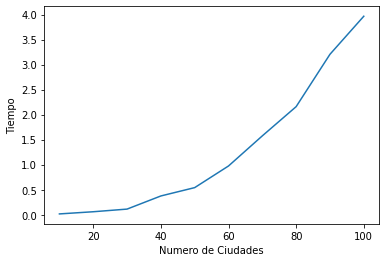

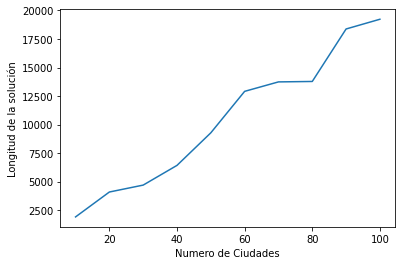

In [7]:
import random
import math
import time
import matplotlib.pyplot as plt

def generador(nCiudades):
    tsp = []
    for i in range(nCiudades):
        distancias = []
        for j in range(nCiudades):
            if j == i:
                distancias.append(0)
            elif j < i:
                distancias.append(tsp[j][i])
            else:
                distancias.append(random.randint(10, 1000))
        tsp.append(distancias)
    return tsp

def evaluarSolucion(datos, solucion):
    longitud = 0
    for i in range(len(solucion)):
        longitud += datos[solucion[i - 1]][solucion[i]]
    return longitud

def obtenerVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    l=len(solucion)
    for i in range(l):
        for j in range(i+1, l):
            n = solucion.copy()
            n[i] = solucion[j]
            n[j] = solucion[i]
            vecinos.append(n)

    ##Obtengo un vecino aleatorio
    vecino=vecinos[random.randint(0, len(vecinos) - 1)]
    longitud = evaluarSolucion(datos, vecino)

    return vecino, longitud

def simAnnealing(datos,t0,tfinal):
    t=t0
    l=len(datos)
    ##Creamos una solucion aleatoria
    ciudades = list(range(l))
    solucion = []
    for i in range(l):
        ciudad = ciudades[random.randint(0, len(ciudades) - 1)]
        solucion.append(ciudad)
        ciudades.remove(ciudad)
    longitud = evaluarSolucion(datos, solucion)
    print("Longitud de la ruta: ", longitud)
    print("Temperatura: ", t)

    it=0
    while t > tfinal:
        ##Obtenemos un vecino al azar
        vecino = obtenerVecino(solucion, datos)
        incremento = vecino[1]-longitud

        if incremento < 0:
            longitud = vecino[1]
            solucion = vecino[0]
        elif random.random() < math.exp(-abs(incremento) / t):
            longitud = vecino[1]
            solucion = vecino[0]

        it+=1
        if it%150==0:
          t=1.5*t
        t=0.99*t
        #print("Longitud de la ruta: ", longitud)
        #print("Temperatura: ", t)
    print(it)
    return solucion, longitud

def main():
    t0=10
    Numero = []
    Tiempo = []
    Solucion = []
    #for i in range(15,60,5):
    for numeroCiudades in range(10,101,10):
    
      datos=generador(numeroCiudades)
      tini = time.time()
      s=simAnnealing(datos,10,0.05)
      tfin = time.time()
      tp = tfin - tini
      print("--------------")
      print("Num: ",50)
      print("Tiempo: ", tp)
      print("Solucion final: ",s[0])
      print("Longitud de la ruta final: ",s[1])
      print("")
      print("")
      Numero.append(numeroCiudades)
      Tiempo.append(tp)
      Solucion.append(s[1])


    fig, ax = plt.subplots()
    ax.plot(Numero, Tiempo)
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Numero de Ciudades")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(Numero, Solucion)
    ax.set_ylabel("Longitud de la solución")
    ax.set_xlabel("Numero de Ciudades")
    plt.show()


if __name__ == "__main__":
    main()